# Bar Chart Race with Matplotlib
[Reference](https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41)

In [3]:
import pandas as pd
from matplotlib import (
    pyplot as plt,
    ticker as ticker,
    animation as animation,
)
from IPython.display import HTML

In [19]:
d_all = pd.read_csv(
    'https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
    usecols=['name', 'group', 'year', 'value'],
)
d_all.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


In [20]:
this_year = 2018
d_year = (
    d_all[d_all['year'].eq(this_year)]
    .sort_values(by='value', ascending=True)
    .head(10)
)

<BarContainer object of 10 artists>

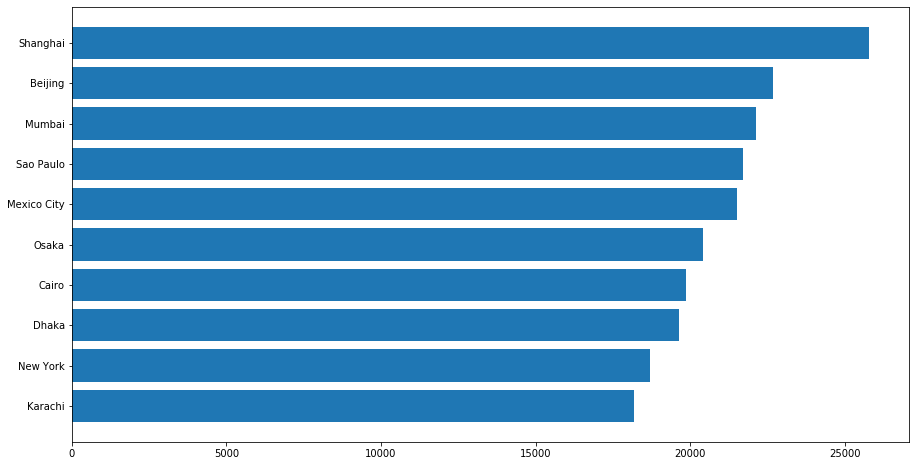

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(d_year['name'], d_year['value'])

In [22]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = d_all.set_index('name')['group'].to_dict()

Text(1, 0.4, '2018')

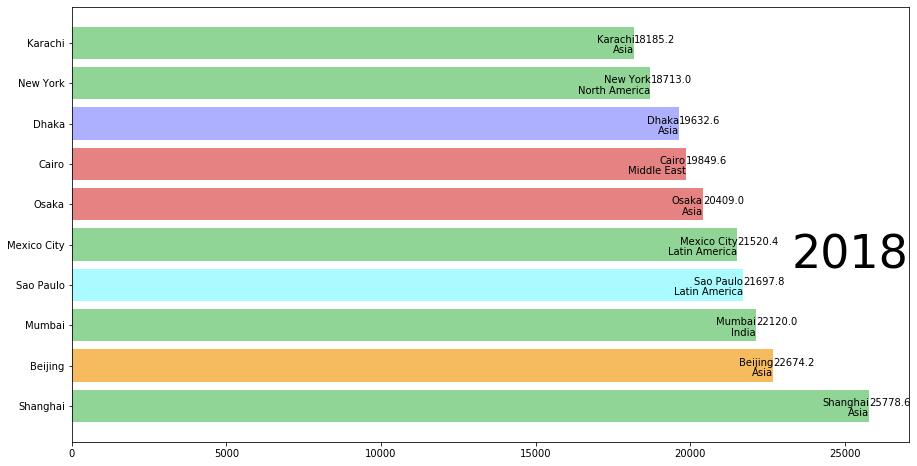

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
d_year = d_year[::-1]
ax.barh(d_year['name'], d_year['value'], color=[colors[group_lk[x]] for x in data_year['name']])
for i, (value, name) in enumerate(zip(d_year['value'], d_year['name'])):
    ax.text(value, i, name, ha='right') # Tokyo: name
    ax.text(value, i-0.25, group_lk[name], ha='right') # Tokyo: name
    ax.text(value, i, value, ha='left') # 0000.0: value
ax.text(1, 0.4, this_year, transform=ax.transAxes, size=46, ha='right')

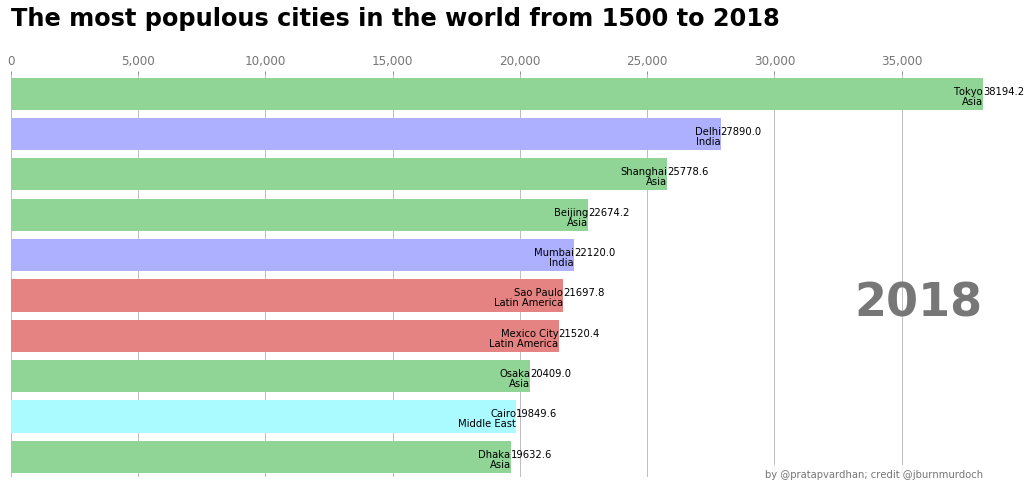

In [56]:
def draw_barchart(year):
    d_year = d_all[d_all['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(d_year['name'], d_year['value'], color=[colors[group_lk[x]] for x in d_year['name']])
    dx = d_year['value'].max() / 200
    for i, (value, name) in enumerate(zip(d_year['value'], d_year['name'])):
        ax.text(value, i, name, ha='right') # Tokyo: name
        ax.text(value, i-0.25, group_lk[name], ha='right') # Tokyo: name
        ax.text(value, i, value, ha='left') # 0000.0: value
    # Polish styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color="#777777", size=46, ha='right', weight=800)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, "The most populous cities in the world from 1500 to 2018",
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.subplots_adjust(top=0.8, bottom=0.1, right=0.95, left=0.05)
    plt.box(False)

fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2018)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


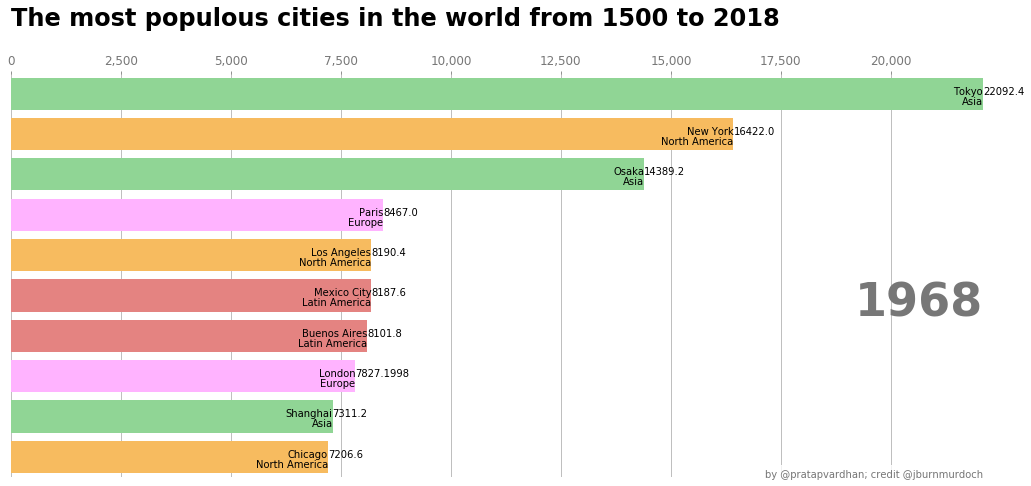

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1968, 2019))
animator.save("animation.gif")
# HTML(animator.to_jshtml())